# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [1]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
df = pd.read_csv('data/retailmax.csv')
print("Forma del dataset:", df.shape)
print("\nPrimeras filas:")
df.head()

Forma del dataset: (200, 5)

Primeras filas:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

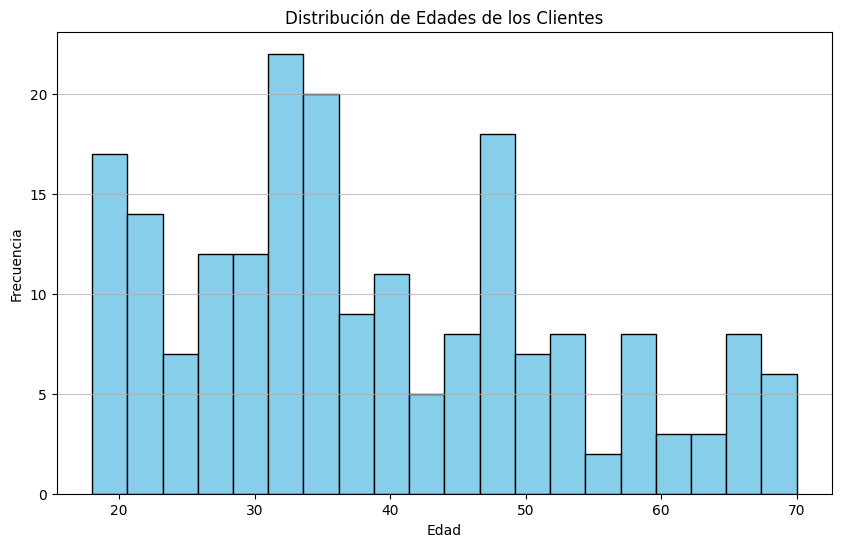

In [3]:
# Histograma de la distribución de edades
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de los Clientes')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

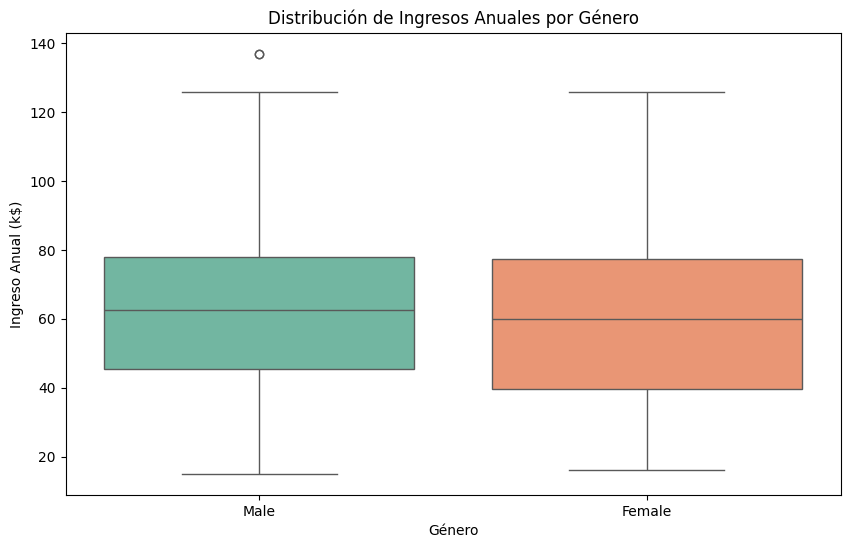

In [4]:
# Boxplot de ingresos anuales por género
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)', palette='Set2')
plt.xlabel('Género')
plt.ylabel('Ingreso Anual (k$)')
plt.title('Distribución de Ingresos Anuales por Género')
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

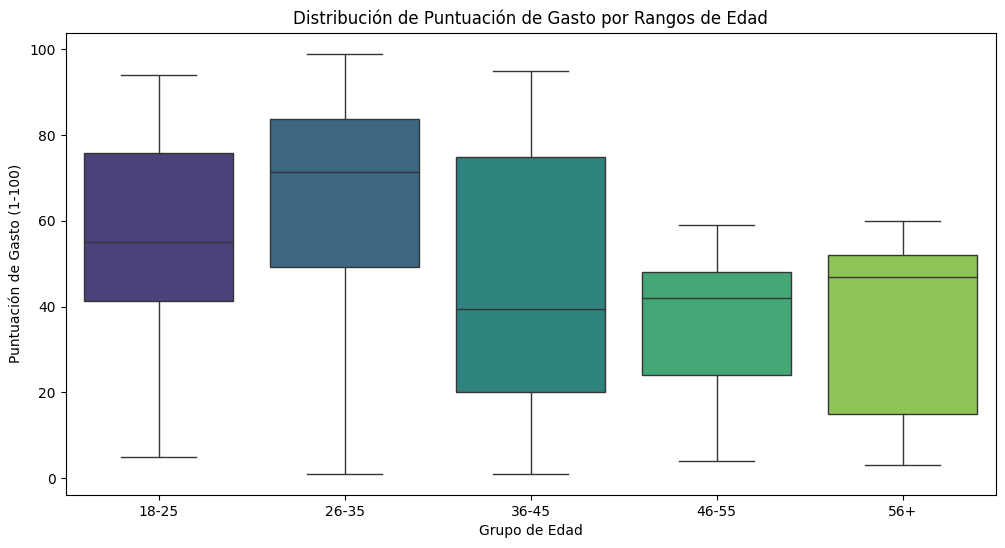

In [5]:
# Crear grupos de edad y visualizar con boxplot
df['Grupo_Edad'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], 
                           labels=['18-25', '26-35', '36-45', '46-55', '56+'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Grupo_Edad', y='Spending Score (1-100)', palette='viridis')
plt.xlabel('Grupo de Edad')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.title('Distribución de Puntuación de Gasto por Rangos de Edad')
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

Coeficiente de correlación: 0.0099


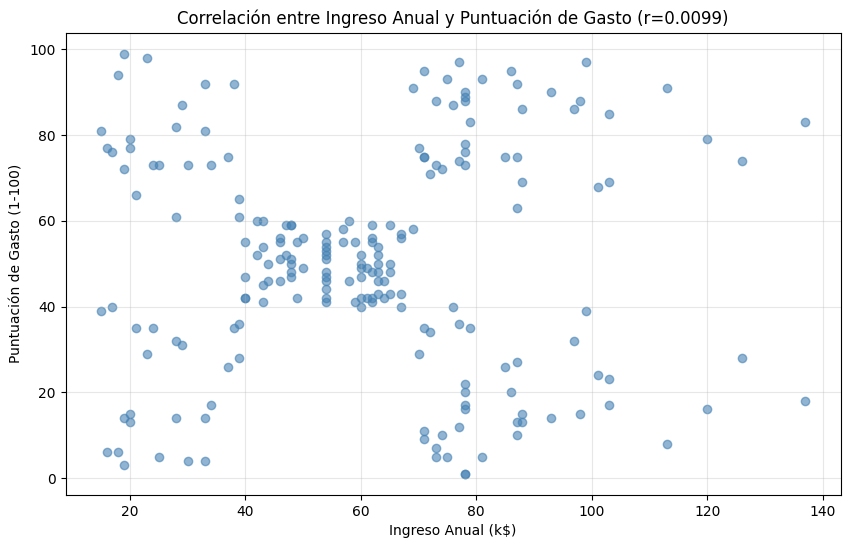

In [6]:
# Calcular correlación y graficar
correlacion = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print(f"Coeficiente de correlación: {correlacion:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6, c='steelblue')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.title(f'Correlación entre Ingreso Anual y Puntuación de Gasto (r={correlacion:.4f})')
plt.grid(alpha=0.3)
plt.show()

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

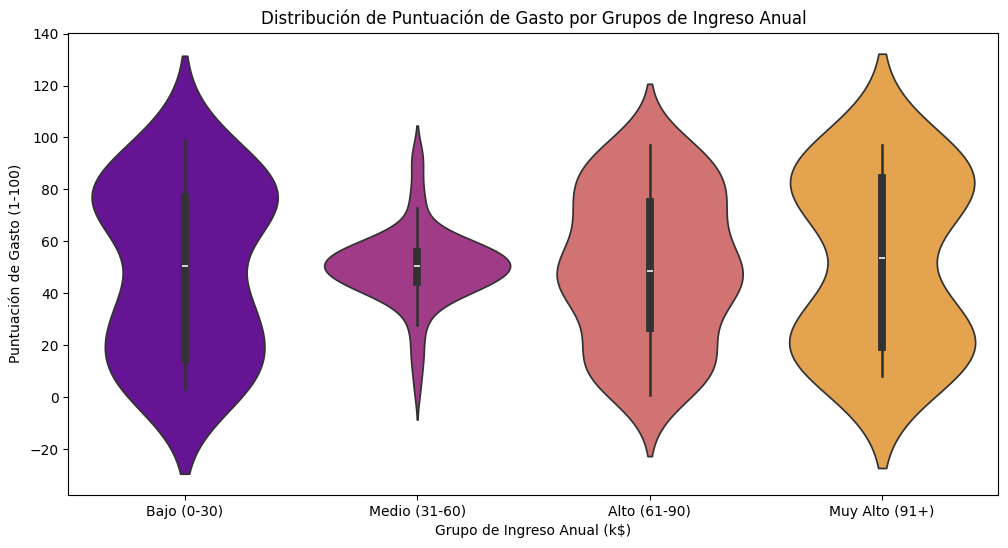

In [7]:
# Crear grupos de ingreso y visualizar con gráfico de violín
df['Grupo_Ingreso'] = pd.cut(df['Annual Income (k$)'], bins=[0, 30, 60, 90, 150], 
                              labels=['Bajo (0-30)', 'Medio (31-60)', 'Alto (61-90)', 'Muy Alto (91+)'])

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Grupo_Ingreso', y='Spending Score (1-100)', palette='plasma')
plt.xlabel('Grupo de Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.title('Distribución de Puntuación de Gasto por Grupos de Ingreso Anual')
plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

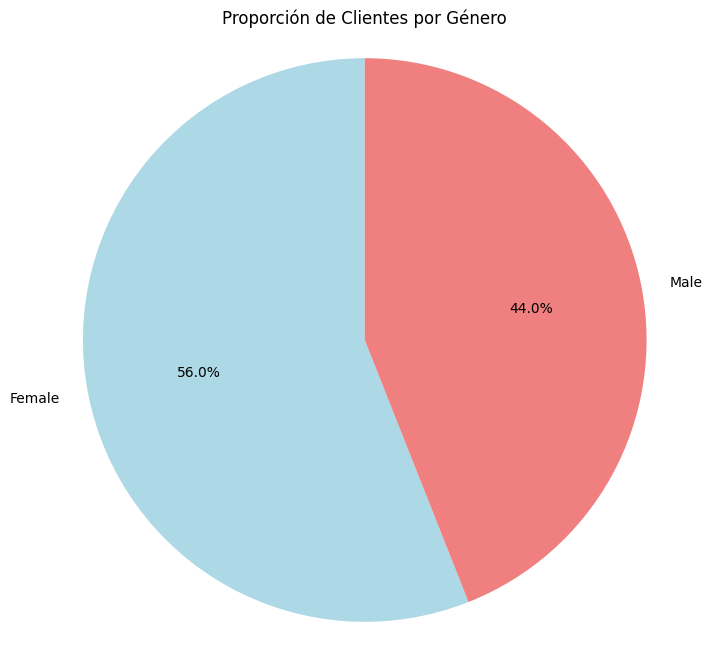


Conteo por género:
Gender
Female    112
Male       88
Name: count, dtype: int64


In [8]:
# Gráfico de pastel de la proporción de clientes por género
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Proporción de Clientes por Género')
plt.axis('equal')
plt.show()

print(f"\nConteo por género:\n{gender_counts}")

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

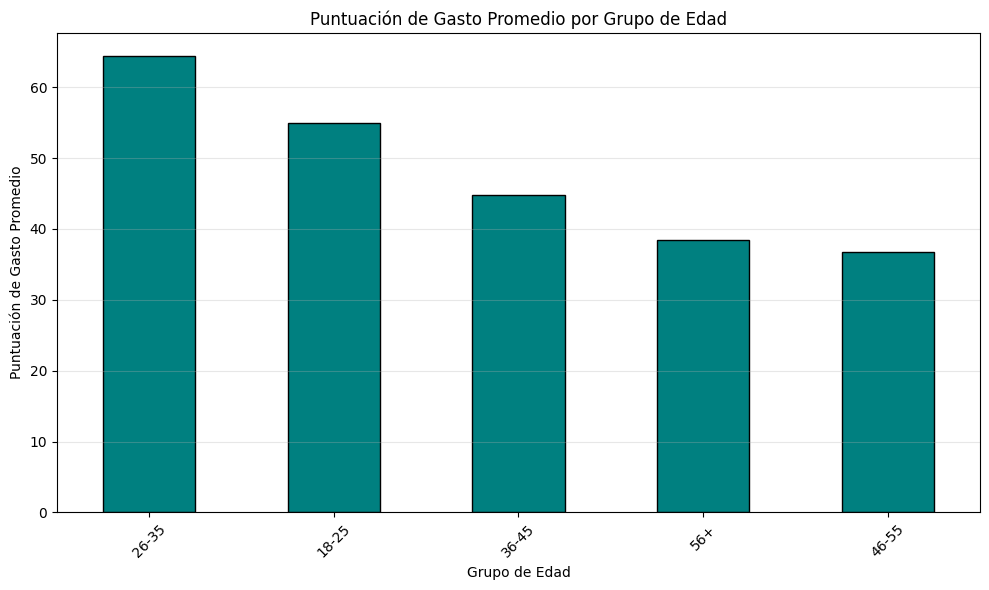


Puntuación de gasto promedio por grupo:
Grupo_Edad
26-35    64.450000
18-25    54.947368
36-45    44.833333
56+      38.379310
46-55    36.702703
Name: Spending Score (1-100), dtype: float64


In [9]:
# Gasto promedio por grupo de edad
# Usar los grupos de edad creados anteriormente
gasto_promedio = df.groupby('Grupo_Edad')['Spending Score (1-100)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
gasto_promedio.plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel('Grupo de Edad')
plt.ylabel('Puntuación de Gasto Promedio')
plt.title('Puntuación de Gasto Promedio por Grupo de Edad')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nPuntuación de gasto promedio por grupo:\n{gasto_promedio}")

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

Coeficiente de correlación entre edad e ingreso: -0.0124


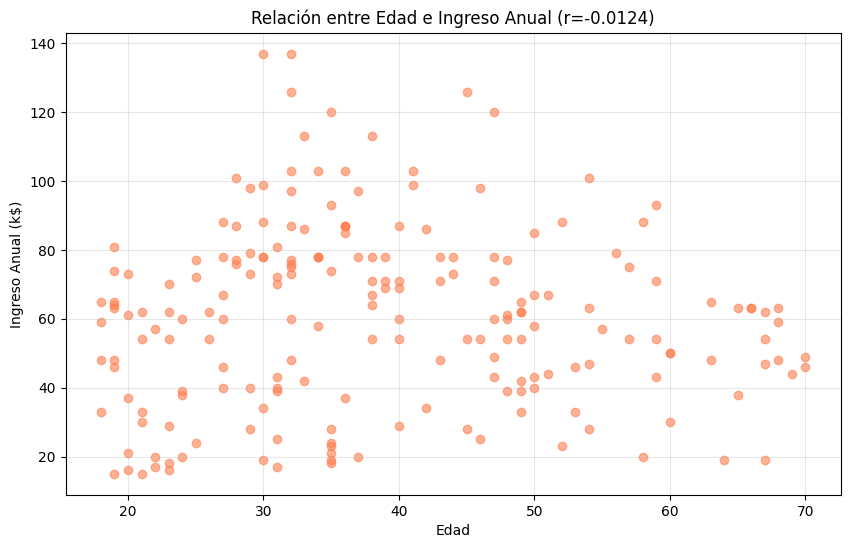

In [10]:
# Relación entre edad e ingreso anual
correlacion_edad_ingreso = df['Age'].corr(df['Annual Income (k$)'])
print(f"Coeficiente de correlación entre edad e ingreso: {correlacion_edad_ingreso:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], alpha=0.6, c='coral')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title(f'Relación entre Edad e Ingreso Anual (r={correlacion_edad_ingreso:.4f})')
plt.grid(alpha=0.3)
plt.show()

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

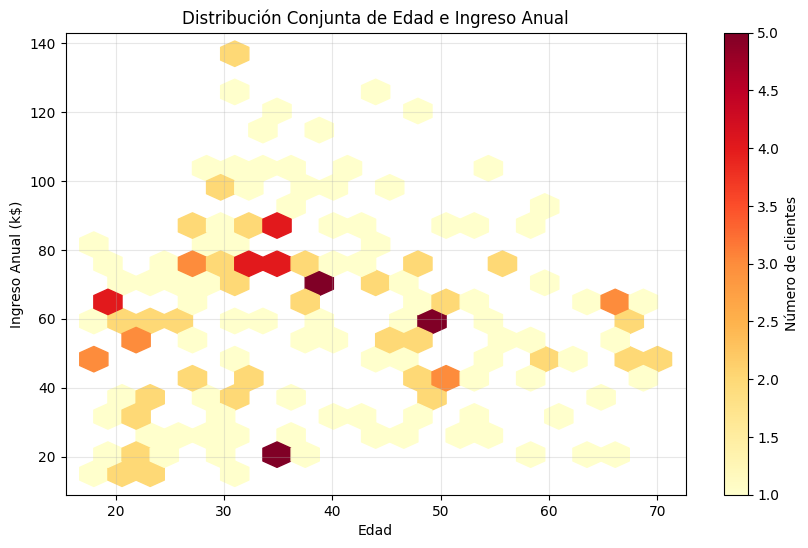

In [11]:
# Distribución conjunta de edad e ingreso anual usando hexbin
plt.figure(figsize=(10, 6))
plt.hexbin(df['Age'], df['Annual Income (k$)'], gridsize=20, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Número de clientes')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title('Distribución Conjunta de Edad e Ingreso Anual')
plt.grid(alpha=0.3)
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

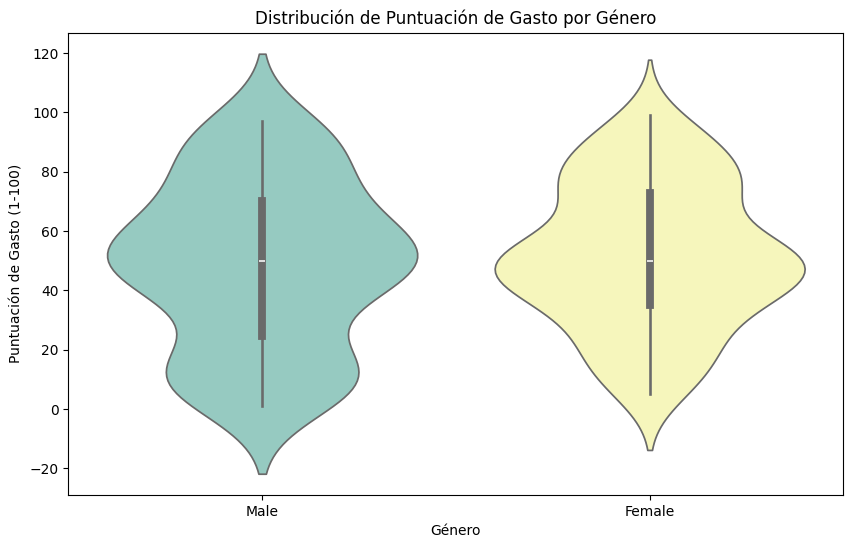


Estadísticas de Puntuación de Gasto por Género:
        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


In [12]:
# Distribución de puntuación de gasto por género usando violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set3')
plt.xlabel('Género')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.title('Distribución de Puntuación de Gasto por Género')
plt.show()

# Estadísticas descriptivas por género
print("\nEstadísticas de Puntuación de Gasto por Género:")
print(df.groupby('Gender')['Spending Score (1-100)'].describe())